# RFM Modelling

## Setting up environment

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import io

In [ ]:
raw_data = pd.read_csv('/content/transaction_data(with_ttl_cals).csv')

In [ ]:
raw_data.head()

,Panel ID,Date,Category,Pack Size,Volume,Spend,unhealthy,Calories/100g,Price per Volume,ttl cals
0,101011101,2018-04-29,SUGAR,2.0,2.0,5.9,1,405,2.99,8100.0
1,101011101,2021-03-14,EGGS,1.0,30.0,9.9,0,97,0.37,1455.0
2,101011101,2018-09-23,SNACK,1.0,0.1,1.3,1,300,23.85,300.0
3,101011101,2021-04-04,COOKING SAUCES,1.0,0.7,5.4,1,175,8.47,1225.0
4,101011101,2020-02-09,COCONUT MILK,1.0,1.0,10.9,1,233,11.02,2330.0


## Date Processing 

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389941 entries, 0 to 1389940
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Panel ID          1389941 non-null  int64  
 1   Date              1389941 non-null  object 
 2   Category          1389941 non-null  object 
 3   Pack Size         1389941 non-null  float64
 4   Volume            1389941 non-null  float64
 5   Spend             1389941 non-null  float64
 6   unhealthy         1389941 non-null  int64  
 7   Calories/100g     1389941 non-null  int64  
 8   Price per Volume  1389941 non-null  float64
 9   ttl cals          1389941 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 106.0+ MB


In [ ]:
raw_data[['Panel ID','Date']]

,Panel ID,Date
0,101011101,2018-04-29
1,101011101,2021-03-14
2,101011101,2018-09-23
3,101011101,2021-04-04
4,101011101,2020-02-09
...,...,...
1389936,802315301,2021-04-25
1389937,802315301,2021-04-25
1389938,802315301,2021-04-04
1389939,802315301,2021-04-04


In [ ]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'])

In [ ]:
print('First recorded purchase: {0}'.format(raw_data['Date'].min()))
print('Last recorded purchase: {0}'.format(raw_data['Date'].max()))
print('Time between last and first purchase: {0}'.format(raw_data['Date'].max() - raw_data['Date'].min()))

First recorded purchase: 2018-04-29 00:00:00
Last recorded purchase: 2021-04-25 00:00:00
Time between last and first purchase: 1092 days 00:00:00


In [ ]:
raw_data.describe()

,Panel ID,Pack Size,Volume,Spend,unhealthy,Calories/100g,Price per Volume,ttl cals
count,1.389941e+06,1.389941e+06,1.389941e+06,1.389941e+06,1.389941e+06,1.389941e+06,1.389941e+06,1.389941e+06
mean,4.731437e+08,1.505325e+00,3.249373e+00,9.778363e+00,6.165945e-01,2.711081e+02,1.261062e+01,3.549799e+03
std,2.815854e+08,1.996701e+00,7.560122e+00,1.606698e+01,4.862159e-01,1.978653e+02,1.129543e+01,7.667438e+03
min,1.010111e+08,3.000000e-01,1.285347e-03,1.000000e-01,0.000000e+00,0.000000e+00,3.700000e-01,0.000000e+00
25%,2.100971e+08,1.000000e+00,3.000000e-01,3.600000e+00,0.000000e+00,9.700000e+01,3.050000e+00,4.850000e+02
50%,3.480771e+08,1.000000e+00,8.000000e-01,5.800000e+00,1.000000e+00,2.330000e+02,1.010000e+01,1.220000e+03
75%,8.007737e+08,2.000000e+00,2.000000e+00,1.090000e+01,1.000000e+00,4.160000e+02,1.629000e+01,2.880000e+03
max,8.023153e+08,3.000000e+02,6.000000e+02,2.250000e+03,1.000000e+00,8.000000e+02,2.001900e+02,9.360000e+05


## Group by and aggregate

In [ ]:
#Group by Panel ID
raw_data.groupby(['Panel ID']).agg({'Date':['max','count'],
                                       'Spend':'sum',
                                      })

Date          Spend
                 max count      sum
Panel ID                           
101011101 2021-04-25   419  4081.70
101016101 2021-04-25   244  1525.80
101019101 2021-04-18  1745  8373.69
101024101 2021-04-25   985  6639.61
105009103 2021-04-25  1199  4459.60
...              ...   ...      ...
802312801 2021-04-18     4    34.40
802313601 2021-04-25    11   139.30
802314001 2021-04-25    18   414.00
802315101 2021-04-25    29   268.20
802315301 2021-04-25    17   362.00

[3917 rows x 3 columns]

In [ ]:
pivot_table = raw_data.groupby(['Panel ID']).agg(Recency =pd.NamedAgg('Date', aggfunc='max'),
                                       Frequency = pd.NamedAgg('Date', aggfunc='nunique'),
                                       Monetary = pd.NamedAgg('Spend', aggfunc='sum'))

In [ ]:
pivot_table

,Recency,Frequency,Monetary
Panel ID,,,
101011101,2021-04-25,113,4081.70
101016101,2021-04-25,62,1525.80
101019101,2021-04-18,152,8373.69
101024101,2021-04-25,152,6639.61
105009103,2021-04-25,156,4459.60
...,...,...,...
802312801,2021-04-18,2,34.40
802313601,2021-04-25,3,139.30
802314001,2021-04-25,3,414.00


In [ ]:
refDate = pd.to_datetime('20210501', format='%Y%m%d')
pivot_table['Recency']=pivot_table['Recency'].apply(lambda x: (refDate - x).days)

## RFM Modeling 

In [ ]:
rfmModel=pivot_table.copy()

In [ ]:
rfmModel.describe()

,Recency,Frequency,Monetary
count,3917.000000,3917.000000,3917.000000
mean,240.559867,66.905029,3469.836048
std,338.362361,52.238900,3674.403496
min,6.000000,1.000000,6.500000
25%,6.000000,16.000000,707.100000
50%,13.000000,58.000000,2403.800000
75%,468.000000,116.000000,5150.000000
max,1098.000000,156.000000,43404.400000


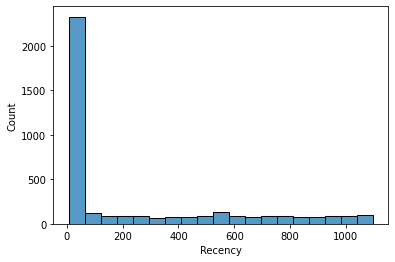

In [ ]:
sns.histplot(x=rfmModel['Recency'])

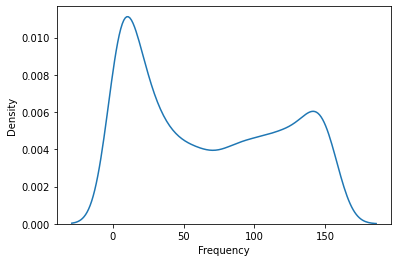

In [ ]:
sns.kdeplot(x=rfmModel['Frequency'])

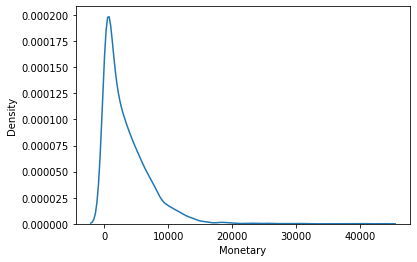

In [ ]:
sns.kdeplot(x=rfmModel['Monetary'])

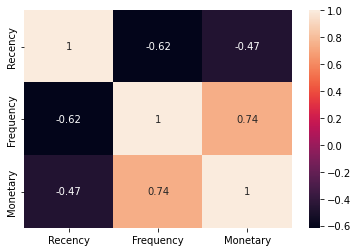

In [ ]:
corrMatrix = rfmModel.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
quantiles = rfmModel.quantile(q=[0.2,0.4,0.6,0.8]) # Get a dataframe of quantiles for each column
quantiles = quantiles.to_dict() #Convert the dataframe into a nested dictionary of quantiles

In [ ]:
quantiles

{'Frequency': {0.2: 11.0, 0.4: 36.0, 0.6: 84.0, 0.8: 126.0},
 'Monetary': {0.2: 502.38000000000005,
  0.4: 1607.3200000000006,
  0.6: 3323.020000000002,
  0.8: 5915.659999999998},
 'Recency': {0.2: 6.0, 0.4: 6.0, 0.6: 69.0, 0.8: 578.6000000000013}}

In [ ]:
def RScores(value,label,dictionary):   #Functions to get the RFM scores. For R scores, the smaller the number the higher the rank (most recent)
    if value <= dictionary[label][0.2]:
        return 5
    elif value <= dictionary[label][0.4]:
        return 4
    elif value <= dictionary[label][0.6]:
        return 3
    elif value <= dictionary[label][0.8]:
        return 2
    else:
        return 1
    
def FMScores(value,label,dictionary):     #Function to get F and M scores. For F and M, the higher the rank, the more frequent and the more money
    if value <= dictionary[label][0.2]:   #has been spent from the customer
        return 1
    elif value <= dictionary[label][0.4]:
        return 2
    elif value <= dictionary[label][0.6]:
        return 3
    elif value <= dictionary[label][0.8]:
        return 4
    else:
        return 5

In [ ]:
#Apply a function along a column of the dataFrame.
#For each row, check the column value and see which bin it belongs to
rfmModel['R'] = rfmModel['Recency'].apply(RScores,args=('Recency',quantiles))
rfmModel['F'] = rfmModel['Frequency'].apply(FMScores,args=('Frequency',quantiles))
rfmModel['M'] = rfmModel['Monetary'].apply(FMScores,args=('Monetary',quantiles))
rfmModel['RFM'] = rfmModel.R.map(lambda x: x*100) + rfmModel.F.map(lambda x:x*10) + rfmModel.M
rfmModel.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM
Panel ID,,,,,,,
101011101,6,113,4081.70,5,4,4,544
101016101,6,62,1525.80,5,3,2,532
101019101,13,152,8373.69,3,5,5,355
101024101,6,152,6639.61,5,5,5,555
105009103,6,156,4459.60,5,5,4,554
105015101,1000,11,422.40,1,1,1,111
105017101,6,146,1362.80,5,5,2,552
105021106,6,155,9706.60,5,5,5,555
105027101,118,116,5051.80,2,4,4,244


In [ ]:
RFM=rfmModel[['R','F','M']].copy()

In [ ]:
RFM.to_csv ('\r rfm.csv', index = True, header=True)

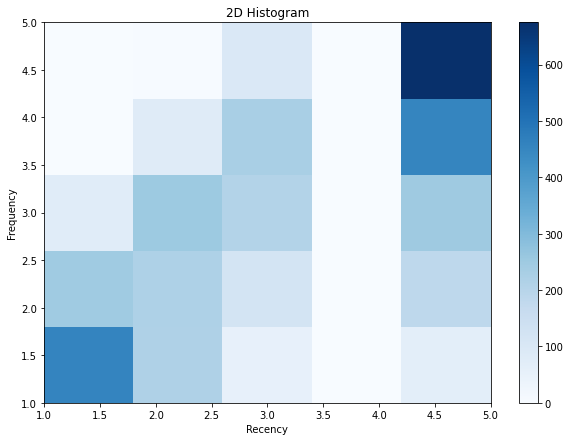

In [ ]:
fig = plt.subplots(figsize =(10, 7))
plt.hist2d(RFM['R'], RFM['F'], cmap='Blues',bins=(5,5))
plt.title("2D Histogram")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.colorbar()

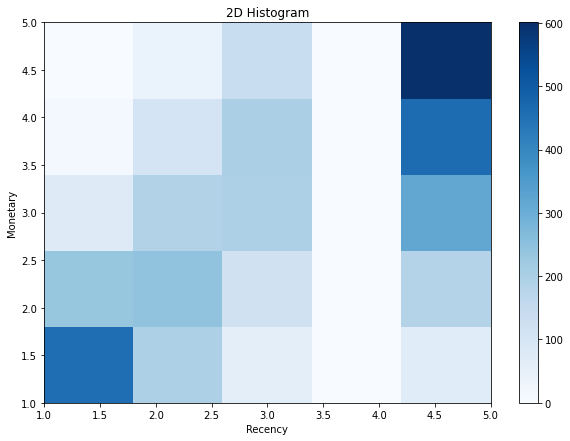

In [ ]:
fig = plt.subplots(figsize =(10, 7))
plt.hist2d(RFM['R'], RFM['M'], cmap='Blues',bins=(5,5))
plt.title("2D Histogram")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.colorbar()

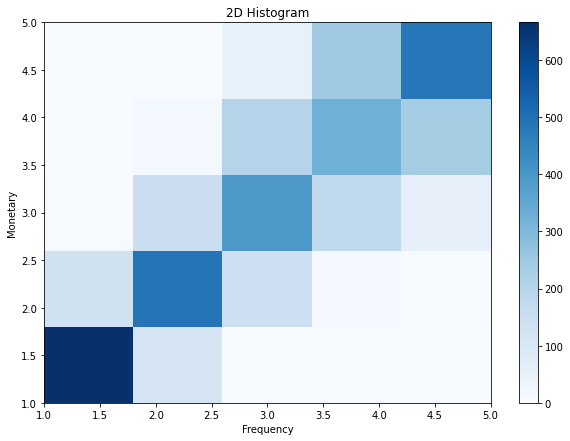

In [ ]:
fig = plt.subplots(figsize =(10, 7))
plt.hist2d(RFM['F'], RFM['M'], cmap='Blues',bins=(5,5))
plt.title("2D Histogram")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.colorbar()

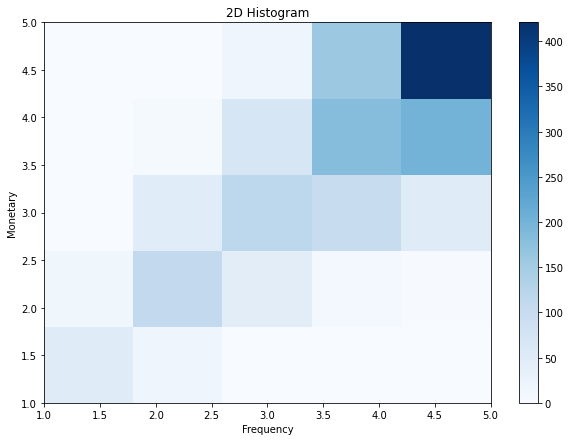

In [ ]:
# 2D histogram after filtering people with recency equals 5
fig = plt.subplots(figsize =(10, 7))
plt.hist2d(RFM[RFM['R']==5]['F'], RFM[RFM['R']==5]['M'], cmap='Blues',bins=(5,5))
plt.title("2D Histogram")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.colorbar()